In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm

In [7]:
def contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

    ax.clabel(cc, cc.levels, inline=True, fontsize=10)

    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

##### **<font color="Purple"> Datos históricos temperatura </font>**

In [8]:
# tas_file = 'tas_day_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500101-20141230.nc'

In [9]:
# tas_ds=xr.open_dataset(tas_file)
# tas=tas_ds['tas']

In [8]:
tas_file = 'tas79.nc'

In [9]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']

###### La ruta tasday79 tiene esto:

In [39]:
# tas = tas-273.15
# #Seleccionar el periodo de 1979 a 2014
# tas79 = tas.where(tas.time.dt.year >= 1979, drop=True)
#ruta_tas79 = 'tasday79.nc'
#tas79.to_netcdf(ruta_tas79)

In [12]:
# Promedio de temperatura por estación 
tas_estacion=tas.groupby(tas.time.dt.season).mean(dim='time') #tas ya está a partir de 1979
tas_djf = tas_estacion[0]

In [13]:
tas_inviernos = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

In [14]:
lats=tas.lat
lons=tas.lon

##### **<font color="Purple"> Datos históricos viento </font>**

###### Las rutas uaday200hpa_99(14)_mx tienen esto:

In [18]:
# u_99='ua_day_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500101-19991230.nc'
# u_14='ua_day_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_20000101-20141230.nc'
# # Abrir archivos y seleccionar variables a usar 
# u_ds99=xr.open_dataset(u_99)
# ua99=u_ds99['ua']  
# u_ds14=xr.open_dataset(u_14)
# ua14=u_ds14['ua']
# #Seleccionar solo 200 hPa y de 1979 a 2014
# ua200_99 = ua99.sel(plev=20000).where((ua99.time.dt.year >= 1979) & (ua99.time.dt.year <= 1999), drop=True)
# ua200_14 = ua14.sel(plev=20000).where(ua14.time.dt.year > 1999, drop=True)
# #Seleccionar solo latitud-loongitud MX
# ua200_99_mx = ua200_99.sel(lat=slice(10, 40),lon=slice(360-129,360-67))
# ua200_14_mx = ua200_14.sel(lat=slice(10, 40),lon=slice(360-129,360-67))
# ruta_v200_1999 = 'uaday200hpa_99_mx.nc'
# ruta_v200_2014 = 'uaday200hpa_14_mx.nc'
# ua200_99_mx.to_netcdf(ruta_v200_1999)
# ua200_14_mx.to_netcdf(ruta_v200_2014)

In [15]:
u_99= 'uaday200hpa_99_mx.nc'
u_14='uaday200hpa_14_mx.nc'

In [16]:
# Abrir archivos y seleccionar variables a usar 
u_ds99=xr.open_dataset(u_99)
ua99=u_ds99['ua']  
u_ds14=xr.open_dataset(u_14)
ua14=u_ds14['ua']

In [17]:
latsu = ua99.lat
lonsu = ua99.lon

###### <h1  style="color:purple; font-size:20px;"><i> Climatología de viento a 20000 Pa </i> </h1>

In [18]:
# Calcular promedio estacional de u,v y seleccionar DJF
ua_estacion99=ua99.groupby(ua99.time.dt.season).mean(dim='time') 
ua_DJF99 = ua_estacion99[0]
ua_estacion14=ua14.groupby(ua14.time.dt.season).mean(dim='time') 
ua_DJF14 = ua_estacion14[0]

In [19]:
ua_inviernos99 = ua99.sel(time=ua99 ['time.month'].isin([12, 1, 2]))
ua_inviernos14 = ua14.sel(time=ua14 ['time.month'].isin([12, 1, 2]))

In [20]:
# Concatenar los dos DataArrays a lo largo del tiempo
ua_inviernos_combined = xr.concat([ua_inviernos99, ua_inviernos14], dim='time')
ua_DJF_combined = xr.concat([ua_DJF99, ua_DJF14], dim='time')

In [21]:
ua_djf = ua_DJF_combined.mean('time')

###### <h1  style="color:purple; font-size:20px;"><i> Función CAO </i> </h1>

In [22]:
def CAOS_MX_jlgf(Tdias):
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []

    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
            dias_CAOS = pd.DataFrame(dias_CAO).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values 
        temp_list.append(temperatura)
     #   print(f"Índice: {indice}, Fecha: {fecha}, Temperatura: {temperatura}")
    
    #print(pd.DataFrame(dias_CAO).drop_duplicates().size)
    #print(len(fechas_CAO_datetime),len(dias_CAO),len(dias_CAO_dates))
    promedioT=np.mean(temp_list)
    
    dicc={'fechas':fechas_indices,'temperaturas':temp_list,'freq':len(dias_CAOS)/36,'promedioT':promedioT}
    
    return dicc

In [23]:
#Elegir un cuadro de 4x4
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))

In [24]:
weights = np.cos(np.deg2rad(longitudes))
weights.name = "weights"

In [25]:
tas_weighted = longitudes.weighted(weights)

In [26]:
weights

<xarray.DataArray 'weights' (time: 3240, lat: 4, lon: 4)> Size: 207kB
array([[[0.9871605 , 0.99271417, 0.9762576 , 0.954101  ],
        [0.9936825 , 0.988893  , 0.9688684 , 0.960655  ],
        [0.9886951 , 0.98045164, 0.9695055 , 0.96517336],
        [0.98676896, 0.9795889 , 0.96536595, 0.96647877]],

       [[0.9884575 , 0.9963707 , 0.9846671 , 0.95895684],
        [0.9948121 , 0.99226385, 0.9829956 , 0.96631116],
        [0.99618965, 0.99028724, 0.9799267 , 0.9727559 ],
        [0.9926018 , 0.9862753 , 0.97982293, 0.97792053]],

       [[0.98690814, 0.9914117 , 0.97805125, 0.95196015],
        [0.9930265 , 0.9867482 , 0.97502   , 0.9588649 ],
        [0.9927116 , 0.98193353, 0.9685829 , 0.96593064],
        [0.9870295 , 0.9753502 , 0.97091246, 0.97059226]],

       ...,

       [[0.98401517, 0.9897723 , 0.976168  , 0.94495726],
        [0.9880564 , 0.9860883 , 0.9749746 , 0.9629939 ],
        [0.9883287 , 0.9855217 , 0.9765603 , 0.97187674],
        [0.9881259 , 0.98193276, 0.9710266 , 0.9772269 ]],

       [[0.9833746 , 0.99102575, 0.97647864, 0.9528434 ],
        [0.98787254, 0.98952407, 0.9764483 , 0.9690969 ],
        [0.98800516, 0.9871911 , 0.9793079 , 0.96885365],
        [0.98904693, 0.9882552 , 0.98033327, 0.9781515 ]],

       [[0.9841084 , 0.99183106, 0.9726966 , 0.9386835 ],
        [0.988867  , 0.99033755, 0.96791506, 0.9507022 ],
        [0.9902932 , 0.9852188 , 0.96797925, 0.959121  ],
        [0.98918736, 0.98661023, 0.9760402 , 0.9678475 ]]], dtype=float32)
Coordinates:
  * time     (time) object 26kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lon      (lon) float64 32B 255.9 257.8 259.7 261.6
  * lat      (lat) float64 32B 23.12 24.38 25.62 26.88
    height   float64 8B ...

In [27]:
norte = tas_weighted.mean(['lon','lat']) #promedio a variable ya pesada
norte #esto ya no lo estoy usando? #peguntar

<xarray.DataArray 'tas' (time: 3240)> Size: 13kB
array([11.943233,  9.749307, 11.778044, ..., 11.680151, 11.034022,
       12.069647], dtype=float32)
Coordinates:
  * time     (time) object 26kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
    height   float64 8B 1.5

In [28]:
resultados_CAO = CAOS_MX_jlgf(norte) #esto llamó a mi función con el que ya está pesado
fechas_cao = resultados_CAO['fechas']

In [29]:
lista_indices=[fechas_cao[key] for key in resultados_CAO['fechas'].keys()]

In [30]:
temperaturas_seleccionadas = tas_inviernos.isel(time=lista_indices)

In [31]:
temp_77=temperaturas_seleccionadas.mean('time')

In [32]:
ua_et_cao = ua_inviernos_combined.isel(time=lista_indices)

In [33]:
viento_77 = ua_et_cao.mean('time')

###### <h1  style="color:purple; font-size:20px;"><i> Climatología de temperatura superficial vs temperatra superficial en CAOS </i> </h1>

In [34]:
anomalia=temp_77-tas_djf

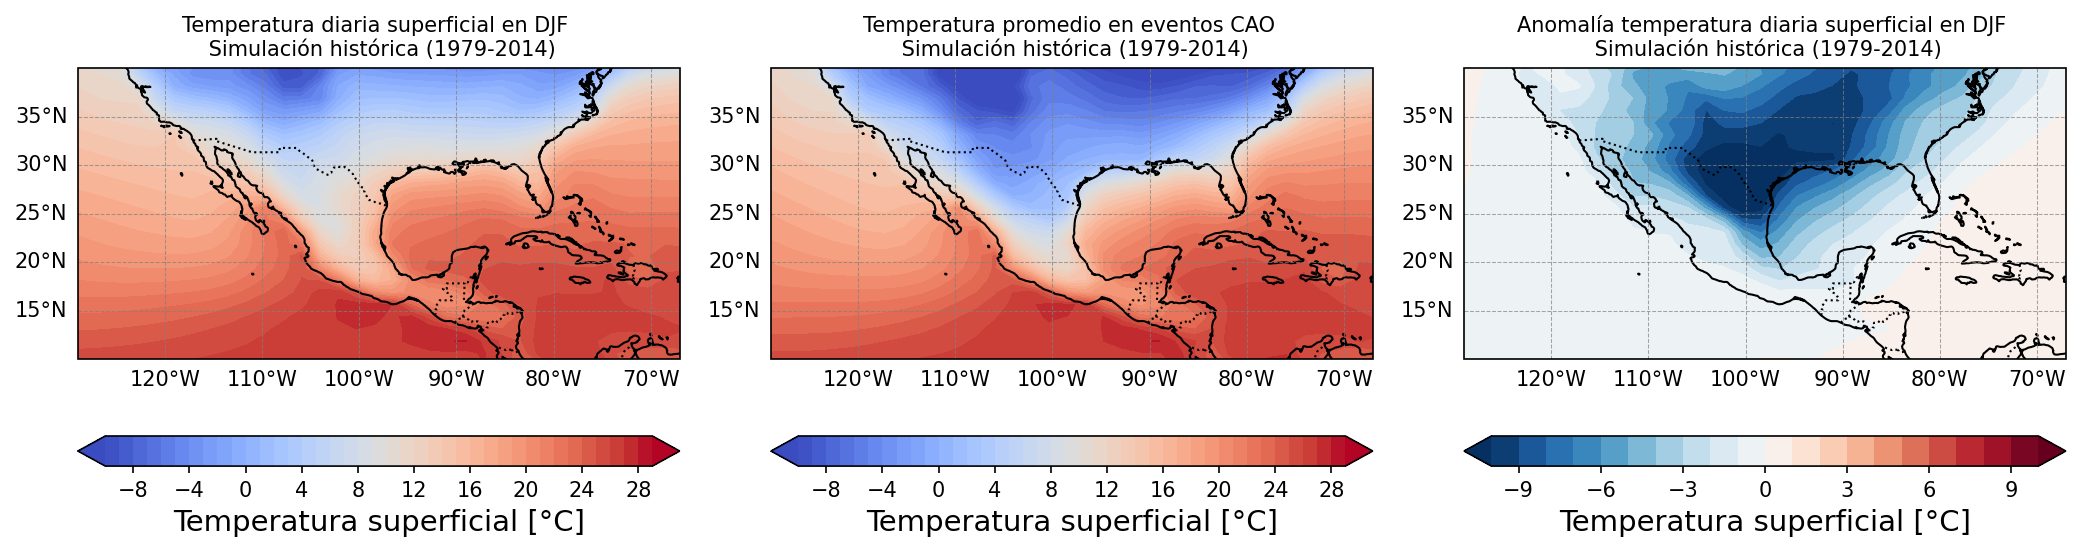

In [35]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

# Subplot 1
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
datatemp, lon = add_cyclic_point(tas_djf, coord=lons)
cs = ax1.contourf(lon, lats, datatemp, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura diaria superficial en DJF \n Simulación histórica (1979-2014)', fontsize=10)

# Subplot 2
ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
datatemp, lon = add_cyclic_point(temp_77, coord=lons)
cs = ax2.contourf(lon, lats, datatemp, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura promedio en eventos CAO \n Simulación histórica (1979-2014)', fontsize=10)

# Subplot 3
ax3 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines()
datatemp, lon = add_cyclic_point(anomalia, coord=lons)
cs = ax3.contourf(lon, lats, datatemp, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax3.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax3)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Anomalía temperatura diaria superficial en DJF \n Simulación histórica (1979-2014)', fontsize=10)

plt.tight_layout(h_pad=2, pad=1)
plt.show()


###### <h1  style="color:purple; font-size:20px;"><i> Climatología de viento vs viento en CAO </i> </h1>

In [38]:
anomaliau = viento_77-ua_djf

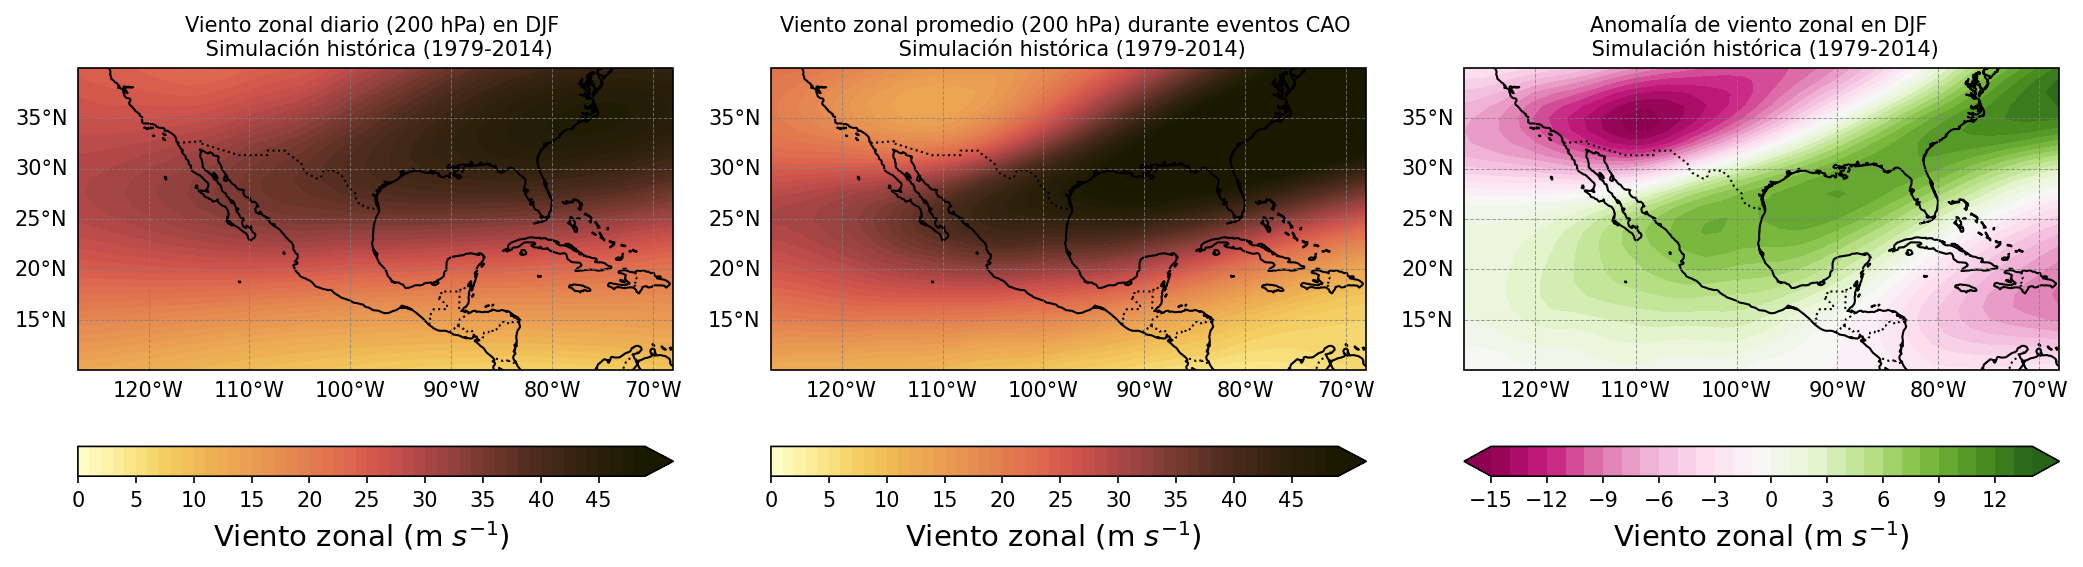

In [43]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

# Subplot 1
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
cs = ax1.contourf(lonsu, latsu, ua_djf, levels=np.arange(0, 50,1), cmap=cm.lajolla_r, extend='max', transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
plt.title('Viento zonal diario (200 hPa) en DJF \n Simulación histórica (1979-2014)', fontsize=10)

# Subplot 2
ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
cs = ax2.contourf(lonsu, latsu, viento_77, levels=np.arange(0, 50, 1), cmap=cm.lajolla_r, extend='max', transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=14)
plt.title('Viento zonal promedio (200 hPa) durante eventos CAO \n Simulación histórica (1979-2014)', fontsize=10)

# Subplot 3
ax3 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines()
cs = ax3.contourf(lonsu, latsu, anomaliau, levels=np.arange(-15, 15, 1), cmap='PiYG', extend='both', transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax3)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
plt.title('Anomalía de viento zonal en DJF \n Simulación histórica (1979-2014)', fontsize=10)

plt.tight_layout(h_pad=2, pad=1)
plt.show()
